In [1]:
from fastai import *
from fastai.tabular import *


In [2]:
df = pd.read_csv("/data/deeplearning/kaggle/heart.csv")

In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
dep_var = 'target'
cont_names = ['age', 'trestbps', 'chol',  'thalach',
       ]
cat_names = [ 'sex', 'cp', 'fbs', 'restecg',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
procs = [ FillMissing, Categorify, Normalize]

In [5]:
path = "/data/deeplearning/kaggle/"

In [6]:
dep_var= 'target'

In [7]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_rand_pct()
                           .label_from_df(cols=dep_var)
                           .databunch())

In [8]:
data.show_batch(rows=10)

In [9]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[[1 1 1 2 1 7 2 1 3]
 [2 2 1 2 1 1 2 1 2]
 [1 2 1 2 1 1 3 2 3]
 [2 2 1 2 1 1 3 1 3]
 [2 2 1 2 1 9 3 2 3]]
[[ 0.430197 -0.117482 -0.958526 -0.824904]
 [-1.4038    0.160765 -0.844405 -0.781498]
 [-1.4038   -1.508715 -0.939506  0.78114 ]
 [-1.295917 -0.673975  0.905457  0.520701]
 [-0.217096  0.105115 -0.882445  0.347074]]
[1 1 1 1 1]


In [23]:
learn = tabular_learner(data, layers=[500,100], metrics=accuracy, emb_drop=0.05)

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


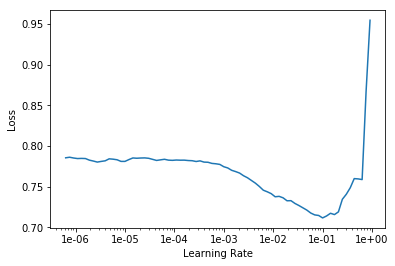

In [17]:
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(100, 5e-3)

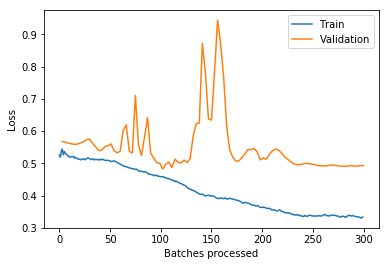

In [27]:
learn.recorder.plot_losses()